# **UPLOADING** THE **DATASET** WITH **GOOGLE** **DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os     #OS = Operation System
Root = "/content/drive/MyDrive/TP-Leclass/RAVDESS"
os.chdir(Root)

In [ ]:
ls

Actor_01/  Actor_05/  Actor_09/  Actor_13/  Actor_17/  Actor_21/
Actor_02/  Actor_06/  Actor_10/  Actor_14/  Actor_18/  Actor_22/
Actor_03/  Actor_07/  Actor_11/  Actor_15/  Actor_19/  Actor_23/
Actor_04/  Actor_08/  Actor_12/  Actor_16/  Actor_20/  Actor_24/


# **EDA — Exploratory Data Analysis - does this for Machine Learning enthusiast**

In [ ]:
# IMPORT NECESSARY LIBRARIES
import librosa    # Audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np   # ARray 
import tensorflow as tf  # Deep learnin
import tensorflow.keras   # Deep Learning
from matplotlib.pyplot import specgram
import pandas as pd
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
from sklearn.model_selection import StratifiedShuffleSplit    # Machine learning library
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.utils.validation import column_or_1d
import warnings # ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

**EXEMPLE** : **ACTOR** **NUMBER** **17**  **WHERE X IS THE DATA & SR IS THE SAMPLE RATE**

***NEUTRAL MALE***

In [ ]:
# LOAD IN FILE FOR EXEMPLE : ACTOR 17
x, sr = librosa.load('/content/drive/MyDrive/TP-Leclass/RAVDESS/Actor_17/03-01-01-01-01-01-17.wav')
# PLAY AUDIO FILE
sf.write('/content/drive/MyDrive/TP-Leclass/RAVDESS/Actor_17/03-01-01-01-01-01-17.wav', x, sr)
Audio(data=x, rate=sr)

Text(0.5, 1.0, 'Waveplot - Actor 17 is Neutral -')

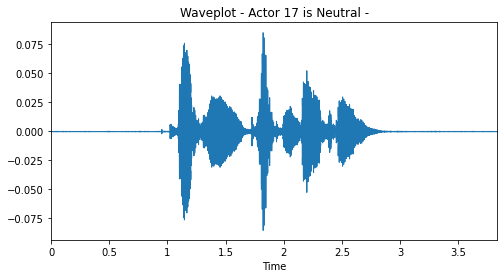

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Actor 17 is Neutral -')

**Mel Spectogram**

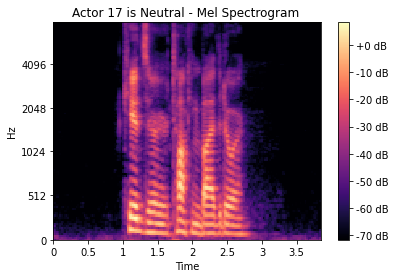

In [ ]:
# CREATE LOG MEL SPECTROGRAM FOR ACTOR 17 FOR EXEMPLE
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Actor 17 is Neutral - Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB');

**Function extract_feature to extract the mfcc, chroma, and mel features from a sound file**

In [ ]:
#Emotions in the RAVDESS dataset - Dictionnary
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
  # Filename identifiers   # Indices

   # Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
   # Vocal channel (01 = speech, 02 = song).
   # Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
   # Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
   # Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
   # Repetition (01 = 1st repetition, 02 = 2nd repetition).
   # Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [ ]:
# CREATE DIRECTORY OF AUDIO FILES 
audio = "/content/drive/MyDrive/TP-Leclass/RAVDESS/"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:          # iterate over all the actors in the RAVDESS DATASET FOR EACH ACTOR
    filename = os.listdir(audio + i) ## OS.LISTDIR ===> Returns a list containing the names of the files in the directory : ACTOR(i) when 01 < i < 24
    for f in filename:        # go through file NAMES WHICH INCLUDE EMOTIONS THEMSELVES in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))  #(7 items) ['03', '01', '08', '02', '02', ...]
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)  # Getting all paths for every Actors

           #### PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fearful', 7:'disgust', 8:'surprised'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df = audio_df.iloc[:-1 , :]
audio_df.shape

(1440, 4)

In [ ]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', None)

audio_df.sample(10)   #échantillon

,gender,emotion,actor,path
1434,female,surprised,24,/content/drive/MyDrive/TP-Leclass/RAVDESS/Actor_24/03-01-08-02-02-01-24.wav
601,male,calm,11,/content/drive/MyDrive/TP-Leclass/RAVDESS/Actor_11/03-01-02-01-02-02-11.wav
1185,female,surprised,20,/content/drive/MyDrive/TP-Leclass/RAVDESS/Actor_20/03-01-08-01-02-01-20.wav
447,female,sad,8,/content/drive/MyDrive/TP-Leclass/RAVDESS/Actor_08/03-01-04-02-02-01-08.wav
1379,male,surprised,23,/content/drive/MyDrive/TP-Leclass/RAVDESS/Actor_23/03-01-08-02-01-01-23.wav
3,male,calm,1,/content/drive/MyDrive/TP-Leclass/RAVDESS/Actor_01/03-01-02-01-01-02-01.wav
789,female,calm,14,/content/drive/MyDrive/TP-Leclass/RAVDESS/Actor_14/03-01-02-01-01-01-14.wav
237,female,surprised,4,/content/drive/MyDrive/TP-Leclass/RAVDESS/Actor_04/03-01-08-02-01-01-04.wav
1164,female,sad,20,/content/drive/MyDrive/TP-Leclass/RAVDESS/Actor_20/03-01-04-02-02-01-20.wav
519,male,happy,9,/content/drive/MyDrive/TP-Leclass/RAVDESS/Actor_09/03-01-03-01-02-02-09.wav


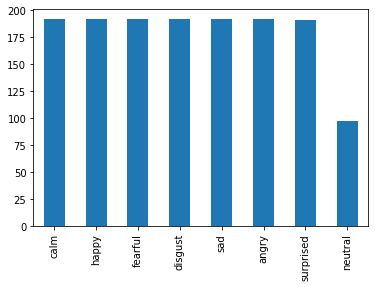

In [ ]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

**Emotions**


In [ ]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])
counter=0
for index,path in enumerate(audio_df.path):    #enumerate ( , ) ==> ('index', path)*audio_df times
  X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)     # Load all paths iteratively as a floating point time series 
                                          # high-quality mode (‘kaiser_best’)
#get the mel-scaled spectrogram (transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes)    
  spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)     
  db_spec = librosa.power_to_db(spectrogram)    #temporally average spectrogram  (Convert a power spectrogram (amplitude squared) to decibel (dB) units)  
  log_spectrogram = np.mean(db_spec, axis = 0)      # Average values into log_spectrogram               
  df.loc[counter] = [log_spectrogram]    
  counter=counter+1

print(len(df),'rows')
df.head()


1440 rows


,mel_spectrogram
0,"[-75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.13959, -75.07223, -75.15071, -75.15071, -75.15071, -75.15071, -75.09937, -75.15071, -75.15071, -75.15071, -75.10905, -75.09412, -75.15071, -74.92822, -74.1517, -74.19842, -74.51549, -75.11954, -75.10399, -75.13165, -75.15071, -75.15071, -75.14988, -75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.069016, -74.12102, -73.617714, -74.536026, -74.17392, -73.56244, -72.48515, -73.084854, -49.680855, -39.80159, -36.830807, -35.70478, -34.180237, -31.86353, -30.69315, -30.325382, -30.965012, -30.82406, -30.03375, -28.690538, -28.168774, -28.138542, -29.081398, -30.787271, -33.000286, -37.51421, -41.930313, -44.93863, -44.383247, -41.121105, -40.154667, -39.98905, -39.938183, -41.252926, -40.4535, -37.338863, -35.710594, -36.26966, -36.070953, -36.352516, -36.936497, -38.03057, -39.899944, -40.525482, -41.244236, -41.383785, -40.33425, -38.542667, -39.557934, -40.667435, -37.19942, -32.58196, -32.73895, -33.5526, -37.302288, -43.403584, -39.877724, -35.744804, -34.76521, -34.00362, -33.99902, -34.42435, -35.477673, -38.351665, -41.04027, ...]"
1,"[-75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.243004, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.24528, -75.04568, -74.99168, -75.19989, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -74.34854, -73.92539, -73.56352, -73.27889, -72.94659, -72.36573, -72.77169, -62.66063, -41.765488, -35.625652, -32.697567, -31.232754, -29.582481, -29.005156, -28.940495, -28.66669, -28.22058, -27.420063, -26.695297, -26.731213, -27.104462, -28.481537, -30.688972, -32.87745, -36.790688, -41.635178, -41.879257, -40.09379, -39.499546, -39.355, -39.876854, -40.17552, -38.197384, -36.35471, -34.195213, -33.323788, -33.642143, -33.76531, -34.102013, -35.333183, -36.94313, -37.931232, -39.940765, -39.828728, -39.29128, -37.974392, -39.12242, -41.313232, -35.535824, -33.189327, -33.90681, -36.375805, -41.008472, -43.743633, -40.78038, -37.379166, -36.989563, -37.33643, -38.593864, -41.70642, -45.89121, -46.88004, -47.354614, -47.581882, -45.365158, ...]"
2,"[-79.61142, -79.61142, -79.61142, -79.61142, -79.61142, -79.61142, -79.61142, -79.61037, -79.61142, -79.5505, -79.3984, -79.58202, -79.61142, -79.61142, -79.6029, -79.60936, -79.61142, -79.6101, -79.575806, -79.36379, -79.24537, -79.572586, -79.61142, -79.10489, -78.0653, -78.34661, -79.32881, -79.61142, -79.3803, -76.99489, -69.49426, -67.420494, -71.69285, -77.55179, -78.59408, -77.33197, -76.80479, -75.728836, -73.6734, -73.63851, -73.79517, -73.320366, -53.179367, -41.105118, -39.716854, -37.36446, -34.027317, -32.77425, -31.815086, -31.81043, -31.427832, -31.59653, -32.039608, -31.864943, -32.456676, -33.20365, -33.501263, -33.637108, -34.00089, -34.49173, -34.897243, -35.60857, -37.031387, -38.84752, -38.970398, -39.801884, -42.110844, -44.887142, -48.34272, -52.338825, -54.5935, -55.26956, -48.771236, -45.475616, -46.225468, -46.426723, -46.939034, -44.739998, -42.745537, -40.823933, -37.87938, -37.480846, -38.51911, -39.358578, -39.506084, -39.92851, -40.663425, -41.11452, -40.952694, -40.562237, -40.20431, -41.16925, -42.07095, -43.064137, -43.627422, -42.979515, -41.427296, -40.834106, -42.271984, -38.925453, ...]"
3,"[-76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.65121, -76.677536, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.80453, -76.5322, -76.44933, -76.64952, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.82804, -76.568886, -74.67807, -73.09236, -74.03147, -74.68943, -64.24568, -47.49774, -41.946453, -39.79607, -39.147137, -40.741, -42.83716

**LOAD THE DATA & EXTRACT FEATURES FOR EACH FILE**


# **Data** **preprocessing**

**I used pd.concat to turn the array into a list and join with my previous DataFrame audio_df, and dropped the necessary columns to give us the final DataFrame.**

In [ ]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.139587,-75.072227,-75.150711,-75.150711,-75.150711,-75.150711,-75.099373,-75.150711,-75.150711,-75.150711,-75.109047,-75.094116,-75.150711,-74.928223,-74.151703,-74.198418,-74.515488,-75.119537,-75.103989,-75.131653,-75.150711,-75.150711,-75.149879,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.069016,-74.121017,...,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.112236,-75.101410,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-74.863907,-74.294701,-74.354446,-74.683067,-74.923653,-74.444016,-74.158699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,neutral,1,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.243004,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.245277,-75.045677,-74.991676,-75.199890,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-74.348541,-73.925392,...,-74.795807,-74.800621,-74.906258,-75.227119,-75.110405,-74.772667,-74.482544,-74.728058,-75.072304,-75.161499,-75.264870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,calm,1,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.610367,-79.611420,-79.550499,-79.398399,-79.582024,-79.611420,-79.611420,-79.602898,-79.609360,-79.611420,-79.610100,-79.575806,-79.363792,-79.245369,-79.572586,-79.611420,-79.104889,-78.065300,-78.346611,-79.328812,-79.611420,-79.380302,-76.994888,-69.494263,-67.420494,-71.692848,-77.551788,-78.594078,-77.331970,-76.804787,...,-77.751556,-78.320374,-79.211922,-79.385170,-79.452354,-79.595520,-79.334435,-79.189003,-79.421410,-79.542503,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.424179,-79.310196,-79.611420,-79.555916,-79.548904,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.611420,-79.595421,-79.611420,-79.611420,-79.611420,-79.611420
3,male,calm,1,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.651207,-76.677536,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.804527,-76.532204,-76.449333,-76.649521,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,...,-75.776962,-76.708275,-76.758972,-76.822235,-76.635643,-75.804024,-75.791672,-76.233810,-76.709061,-76.738503,-76.742928,-76.783592,-76.828041,-76.799324,-76.765839,-76.828041,-76.828041,-76.828041,-76.799454,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.828041,-76.805473,-76.828041
4,male,calm,1,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.127945,-80.133469,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-79.741898,-79.204338,-79.975922,-80.147377,-80.118141,-80.035789,-79.775558,-79.230133,-80.020821,-80.147377,-

# **SPLITTING THE DATA INTO A TRAINING** **SET** & **A TEST SET**

In [ ]:
# TRAIN TEST SPLIT DATA
train , test = train_test_split(df_combined, test_size=0.2, random_state=0, stratify=df_combined[['emotion','gender','actor']])
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1152, 259)
(1152, 1)
(288, 259)
(288, 1)


In [ ]:
# Stand DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1152, 259)
(1152, 1)
(288, 259)
(288, 1)


In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
1290,-0.724474,-0.690902,-0.655712,-0.699801,-0.733181,-0.745192,-0.747937,-0.334767,0.152134,0.112030,0.021876,0.140879,0.343328,0.675218,0.741170,0.624692,0.691070,0.744045,0.773791,0.733525,0.636596,0.561763,0.584311,0.548202,0.455324,0.355927,0.269208,0.231018,0.112446,-0.052870,-0.223833,-0.432517,-0.507920,-0.571906,-0.665762,-0.751709,-0.765293,-0.522798,-0.473809,-0.666073,...,-0.847616,-0.812507,-0.781283,-0.757073,-0.788208,-0.795023,-0.760363,-0.733562,-0.737397,-0.766288,-0.773618,-0.770094,-0.764285,-0.757411,-0.751866,-0.734686,-0.724458,-0.740664,-0.734783,-0.729917,-0.736627,-0.731861,-0.727389,-0.739589,-0.738059,-0.738359,-0.763098,-0.759768,-0.755166,-0.776550,-0.771209,-0.768127,-0.790856,-0.787845,-0.834240,-0.832587,-0.830335,-0.884560,-0.883523,-0.882953
268,2.769501,2.746434,2.650392,2.625192,2.597468,2.560641,2.466780,2.416538,2.367337,2.334549,2.345329,2.339394,2.300277,2.209230,2.138609,2.117111,2.073162,1.949257,1.865474,1.858683,1.766619,1.677620,1.662828,1.579513,1.549091,1.495379,1.417014,1.323967,1.261423,1.088824,0.714880,0.407616,0.385193,0.217728,0.118908,0.038677,-0.013677,-0.147208,-0.343396,-0.501027,...,-0.494641,-0.567373,-0.637381,-0.674954,-0.756188,-0.760898,-0.652377,-0.669047,-0.742267,-0.670619,-0.593292,-0.585200,0.688347,1.252181,1.192642,1.133875,1.063929,0.810821,0.742257,0.684967,0.538540,0.469392,0.401277,0.244630,0.200852,0.180768,0.113118,0.103081,0.098628,0.029545,0.019458,-0.021380,-0.119633,-0.103803,-0.187550,-0.208932,-0.241444,-0.336258,-0.309929,-0.246951
1394,-0.894800,-0.907891,-0.911556,-0.909594,-0.911343,-0.913305,-0.912171,-0.911926,-0.918431,-0.920397,-0.926180,-0.930017,-0.933128,-0.935876,-0.932171,-0.931276,-0.936371,-0.943560,-0.942843,-0.943354,-0.645113,-0.616500,-0.929841,-0.829848,-0.817333,-0.920645,-0.914527,-0.907025,-0.898939,-0.892374,-0.892162,-0.899317,-0.903068,-0.903516,-0.922342,-0.951621,-0.995750,-0.950955,-0.946753,-0.917706,...,-0.951125,-0.960764,-0.931475,-0.873279,-0.891974,-0.897539,-0.842588,-0.770490,-0.797967,-0.814928,-0.810766,-0.848717,-0.821989,-0.765961,-0.759432,-0.746255,-0.814688,-0.817847,-0.803764,-0.775215,-0.771639,-0.738541,-0.758300,-0.785220,-0.777100,-0.771322,-0.805743,-0.809757,-0.803291,-0.834082,-0.835996,-0.822332,-0.842353,-0.836347,-0.887681,-0.880272,-0.881390,-0.919146,-0.909413,-0.920507
260,-2.110874,-2.068297,-2.142532,-2.104780,-1.925197,-1.782598,-1.901019,-2.097422,-2.114661,-2.022842,-1.582673,-1.516108,-1.630780,-1.686211,-1.450286,-1.531809,-1.850567,-1.722951,-1.461436,-1.705017,-2.026059,-2.001503,-1.717015,-1.714691,-1.947316,-1.972873,-1.919163,-1.852591,-1.939660,-1.932057,-1.899650,-1.871569,-1.465805,-1.243164,-1.031905,-0.907618,-0.731710,-0.710747,-0.692412,-0.586533,...,0.738780,0.759082,0.573756,0.402895,0.361116,0.259878,-0.001329,0.116784,0.072450,-0.248731,-0.326414,-0.411693,-0.430682,-0.485123,-0.550844,-0.576092,-0.553468,-0.543344,-0.525863,-0.504025,-0.487755,-0.507541,-0.531358,-0.580878,-0.551142,-0.565201,-0.653795,-0.697858,-0.706000,-0.669257,-0.678511,-0.706724,-0.741365,-0.745859,-0.817606,-0.810449,-0.828100,-0.888996,-0.910473,-1.010506
691,0.366820,0.343223,0.333865,0.327548,0.334964,0.328039,0.320141,0.311597,0.288735,0.275144,0.267569,0.251693,0.251458,0.242852,0.238316,0.230737,0.216007,0.197843,0.221005,0.270115,0.658010,0.774942,0.748348,0.873554,1.073687,1.320113,1.530578,1.680884,1.824979,1.955332,2.049233,2.153091,2.295319,2.342841,2.348163,2.441880,2.488584,2.533712,2.564273,2.572016,...,0.023223,0.059095,0.096537,0.053305,0.059843,0.102477,0.099345,0.065606,0.082689,0.045843,0.065769,0.026748,0.040932,0.090834,0.029965,0.004874,0.004626,-0.045908,-0.046628,-0.054775,-0.078732,-0.093172,-0.0

# **SVM**

In [ ]:
#Initialize the SVM Classifier
from sklearn.svm import SVC
SVM_Classifier = SVC(C=1, kernel = 'rbf', probability = True , decision_function_shape='ovo' , random_state = 42)
SVM_Classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, decision_function_shape='ovo', probability=True, random_state=42)

In [ ]:
# Predicting the Test set results
y_pred = SVM_Classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)

[[20  0  5  3  5  0  1  6]
 [ 0 29  2  1  1  0  4  1]
 [ 0  2 21  2  2  0  9  1]
 [ 3  0  3 14  9  0  3  6]
 [ 2  1  2  1 16  2  2  9]
 [ 0  6  1  2  3  4  7  1]
 [ 0  8  2  4  8  1 13  2]
 [ 5  1  2  0  5  2  3 20]]


In [ ]:
#Calculate the accuracy of our model
accuracy_SVM = accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy Score for SVM : {:.2f}%".format(accuracy_SVM*100))

Accuracy Score for SVM : 47.57%


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVM_Classifier, X = X_train, y = y_train, cv = 3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("3Folds Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

3Folds Accuracy: 42.27 %
Standard Deviation: 1.60 %


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.67      0.50      0.57        40
        calm       0.62      0.76      0.68        38
     disgust       0.55      0.57      0.56        37
     fearful       0.52      0.37      0.43        38
       happy       0.33      0.46      0.38        35
     neutral       0.44      0.17      0.24        24
         sad       0.31      0.34      0.33        38
   surprised       0.43      0.53      0.48        38

    accuracy                           0.48       288
   macro avg       0.48      0.46      0.46       288
weighted avg       0.49      0.48      0.47       288



# **Decision Tree**

In [ ]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_DTC = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 24 , splitter = 'best' ,max_features = 'log2', random_state = 42)
classifier_DTC.fit(X_train, y_train)

DecisionTreeClassifier(max_features='log2', max_leaf_nodes=24, random_state=42)

In [ ]:
# Predicting the Test set results
y_pred = classifier_DTC.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm_Tree = confusion_matrix(y_test, y_pred)
print(cm_Tree)
# Accuracy Score of the Decision Tree MODEL
Accuracy_DTC = accuracy_score(y_test, y_pred)
print(Accuracy_DTC)

[[19  0  6  3  5  0  0  7]
 [ 0 20  7  0  0  2  7  2]
 [ 0  3 24  0  1  1  6  2]
 [ 7  1  4  6  4  1  3 12]
 [ 4  0  5  2  1  2  5 16]
 [ 0  3  5  0  0  5 10  1]
 [ 1  6  5  0  2  3 14  7]
 [ 1  0  4  3  0  0  5 25]]
0.3958333333333333


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_DTC, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 32.12 %
Standard Deviation: 1.62 %


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.59      0.47      0.53        40
        calm       0.61      0.53      0.56        38
     disgust       0.40      0.65      0.49        37
     fearful       0.43      0.16      0.23        38
       happy       0.08      0.03      0.04        35
     neutral       0.36      0.21      0.26        24
         sad       0.28      0.37      0.32        38
   surprised       0.35      0.66      0.45        38

    accuracy                           0.40       288
   macro avg       0.39      0.38      0.36       288
weighted avg       0.39      0.40      0.37       288



# **CNN** **MODEL**

***TURNING DATA INTO ARRAYS FOR KERAS + LABEL ENCODING***


In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1152, 259)
(1152, 1)
(288, 259)
(288, 1)


In [ ]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


In [ ]:
#X_train = np.expand_dims(X_train, axis=2)
#X_test = np.expand_dims(X_test, axis=2)
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

In [ ]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#nsamples, nx, ny = X_train.shape
#X_train = X_train.reshape((nsamples,nx*ny))
#print(X_train)
#nsamplese, nxe, nye = X_test.shape
#X_test = X_test.reshape((nsamplese,nxe*nye))


(1152, 259, 1)
(1152, 8)
(288, 259, 1)
(288, 8)


***BUILDING MY OWN CNN ARCHITECTURE***

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
#BUILDING MY OWN CNN ARCHITECTURE
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 250, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 241, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 30, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 21, 128)           163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 128)           0         
 1D)                                                    

**FIT MODEL AND USE CHECKPOINT TO SAVE BEST CNN MODEL**

In [ ]:
import tensorflow.keras as keras

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("99_cnn_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_freq=1, save_weights_only=True)

model_history=model.fit(np.array(X_train), y_train,batch_size=32, epochs=188, validation_data=(X_test, y_test),callbacks=[checkpoint])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
36/36 [==============================] - 6s 173ms/step - loss: 1.0028 - accuracy: 0.6467 - val_loss: 1.3353 - val_accuracy: 0.5625
Epoch 58/188
36/36 [==============================] - 6s 175ms/step - loss: 0.9498 - accuracy: 0.6536 - val_loss: 1.3299 - val_accuracy: 0.5278
Epoch 59/188
36/36 [==============================] - 6s 175ms/step - loss: 0.9386 - accuracy: 0.6710 - val_loss: 1.3272 - val_accuracy: 0.5312
Epoch 60/188
36/36 [==============================] - 6s 176ms/step - loss: 0.9073 - accuracy: 0.6962 - val_loss: 1.3372 - val_accuracy: 0.5382
Epoch 61/188
36/36 [==============================] - 6s 176ms/step - loss: 0.9106 - accuracy: 0.6780 - val_loss: 1.3316 - val_accuracy: 0.5382
Epoch 62/188
36/36 [==============================] - 6s 177ms/step - loss: 0.9020 - accuracy: 0.6849 - val_loss: 1.3214 - val_accuracy: 0.5417
Epoch 63/188
36/36 [==============================] - 6s 178ms/step - l

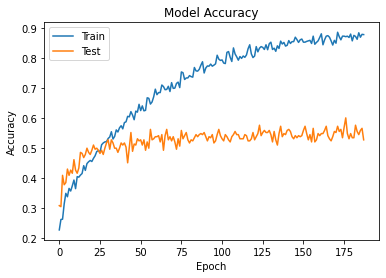

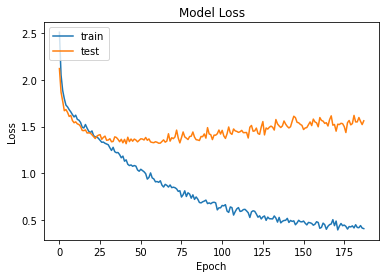

In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**PRINTING THE LOSS & ACCURACY PERCENTAGE ON THE TEST SET**


In [ ]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 34ms/step - loss: 1.5619 - accuracy: 0.5278
Loss of the model is -  1.5618882179260254
9/9 [==============================] - 0s 34ms/step - loss: 1.5619 - accuracy: 0.5278
Accuracy of the model is -  52.77777910232544 %


In [ ]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[68:88]

,Actual Values,Predicted Values
68,calm,calm
69,happy,disgust
70,calm,sad
71,disgust,fearful
72,calm,calm
73,fearful,fearful
74,fearful,surprised
75,surprised,surprised
76,disgust,happy
77,angry,happy


In [ ]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.62      0.57      0.60        40
        calm       0.56      0.74      0.64        38
     disgust       0.62      0.68      0.65        37
        fear       0.59      0.42      0.49        38
       happy       0.37      0.37      0.37        35
     neutral       0.46      0.50      0.48        24
         sad       0.42      0.34      0.38        38
    surprise       0.52      0.58      0.55        38

    accuracy                           0.53       288
   macro avg       0.52      0.53      0.52       288
weighted avg       0.53      0.53      0.52       288



# **CNN TRANSFER LEARNING : vgg16, vgg19, Xception, ResNet50, MobileNetV2, DenseNet121, EfficientNetB5.**

In [ ]:
!pip install keras-tqdm
!pip install pycm

In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import time
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm
# keras imports
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.densenet import DenseNet121
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.efficientnet import EfficientNetB5


# filter warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from keras_tqdm import TQDMNotebookCallback
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.models import model_from_json
from keras.layers import Input
from keras.layers import Dense,GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from pycm import *
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from numpy import array
from sklearn.model_selection import KFold
from keras.preprocessing.image import load_img
from tqdm import tqdm_notebook as tqdm
from keras_tqdm import TQDMNotebookCallback
from keras_tqdm import TQDMCallback
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import MaxPooling2D
import keras
from keras import optimizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
def plot_acc_loss(history, PLOT_NAME, Folder_Training_name):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
def getPrediction(l):
  res = []
  i=0
  while i<len(l):
    if(l[i][0]==True):
      res.append(1)
    else:
      res.append(0)
    i+=1
  return res
#---------------------------------------------------------------------- Main
all_deep_models = [VGG16, VGG19, Xception, DenseNet121, MobileNetV2, ResNet50, EfficientNetB5]
all_model_name_txt = ["VGG16", "VGG19", "Xception", "DenseNet121", "MobileNetV2", "ResNet50", "EfficientNetB5"]



CLASSES = 2
WIDTH = 640
HEIGHT = 480
BATCH_SIZE = 10
EPOCHS = 5
learning_rate = 0.01
all_Kfolds = ["_kfold1", "_kfold2", "_kfold3"]

all_folder_training_names = [
                             "/TP-Leclass/SER_transfer_lear/ourdataset/train"
                             ]

for Folder_Training_name in all_folder_training_names:
  print ("---------------------------------------------------------------------------")
  print ("- Training Folder Name: "+str(Folder_Training_name))
  print ("---------------------------------------------------------------------------")
  i=0
  for deep_model in all_deep_models:
    model_name = deep_model
    model_name_txt = str(all_model_name_txt[i])
    print ("- Deep model: "+str(model_name_txt))
    for KFOLD_ in all_Kfolds:
      
      print ("-KFold: "+str(KFOLD_))
      
      
      TRAIN_DIR = "/content/drive/MyDrive"+str(Folder_Training_name)+"/train"+str(KFOLD_)+"/"
      TEST_DIR = "/content/drive/MyDrive"+str(Folder_Training_name)+"/test"+str(KFOLD_)+"/"
      FOLD_NAME = str(model_name_txt)+str(KFOLD_)+".txt"
      Train_TimeFOLD_NAME = "TrainingTime_"+str(model_name_txt)+str(KFOLD_)+".txt"
      PLOT_NAME = model_name_txt+"/"+str(model_name_txt)+str(KFOLD_)+".png"

      # setup model
      base_model = model_name(weights='imagenet', include_top=False, input_tensor=Input(shape=(480, 640, 3)))
      print ("# Base model architecture before update")
      base_model.summary()

      x=base_model.output

      x=GlobalAveragePooling2D()(x)
      x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
      x=Dense(512,activation='relu')(x) #dense layer 2
      x=Dense(128,activation='relu')(x) #dense layer 3
        #Batch normalization is a technique for training very deep neural networks 
        #that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process 
        #and dramatically reducing the number of training epochs required to train deep networks.
      x = BatchNormalization()(x)
      preds=Dense(1, activation='sigmoid')(x) #final layer with softmax activation
      model = Model(inputs=base_model.input, outputs=preds)
      # Say not to train first layer (ResNet) model as it is already trained
      model.layers[0].trainable = False
      adam = Adam(learning_rate = learning_rate)
      model.compile(optimizer = adam,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

      print ("# Final model architecture after update")
      model.summary()
    #for bi class: loss = 'categorical_crossentropy'
    #for muti class: loss='categorical_crossentropy'


      # data prep
      train_datagen = ImageDataGenerator()
      validation_datagen = ImageDataGenerator()
      print ("-- Load Training data: ")
      train_generator = train_datagen.flow_from_directory(TRAIN_DIR,target_size=(HEIGHT, WIDTH),batch_size=BATCH_SIZE,class_mode='categorical')
      print ("-- Load Test data: ")
      validation_generator = validation_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(HEIGHT, WIDTH),
          batch_size=BATCH_SIZE,
          shuffle=False,
          class_mode='categorical')

      print ("------ validation_generator.class_indices ----------")
      print (validation_generator.class_indices)
      print ("----------------------------------------------------")
      STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
      STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size


      STEPS_PER_EPOCH = STEP_SIZE_TRAIN
      VALIDATION_STEPS = STEP_SIZE_VALID

      #STEPS_PER_EPOCH = 5
      #VALIDATION_STEPS = 5
      print ("- EPOCHS: "+str(EPOCHS))
      print ("- BATCH_SIZE: "+str(BATCH_SIZE))
      #print ("- STEPS_PER_EPOCH: "+str(STEPS_PER_EPOCH))
      #print ("- VALIDATION_STEPS: "+str(VALIDATION_STEPS))
      #1 Epoch = 1 Forward pass + 1 Backward pass for ALL training samples.
      #Batch Size = Number of training samples in 1 Forward/1 Backward pass. 
      # (With increase in Batch size, required memory space increases.)
      #Number of iterations = Number of passes i.e. 1 Pass = 1 Forward pass + 1 Backward pass 
      # (Forward pass and Backward pass are not counted differently.)

      MODEL_FILE = "/content/drive/MyDrive"+str(Folder_Training_name)+"/output/"+str(model_name_txt)+"/"+KFOLD_+str(model_name_txt)+".model"
      start_time = time.time()
      
      checkpoint = ModelCheckpoint(MODEL_FILE,
                                  monitor='val_accuracy',
                                  verbose=1,
                                  mode='max',
                                  save_best_only=True,
                                  save_weights_only=False,
                                  save_freq=1)
      
      history = model.fit(
          train_generator,
          epochs = EPOCHS,
          steps_per_epoch = 50,
          validation_steps = VALIDATION_STEPS,
          validation_data = validation_generator,callbacks=[checkpoint])
      #callbacks=[checkpoint]


      end_time = time.time()
      duration = end_time - start_time
      print("Total training time = "+str(duration))
      tt = "/content/drive/MyDrive"+str(Folder_Training_name)+"/output/"+str(model_name_txt)+"/"+Train_TimeFOLD_NAME
      f = open(tt, "w")
      f.write("\n"+str(duration))
      f.close()
      model.save(MODEL_FILE)
      plot_acc_loss(history, PLOT_NAME, Folder_Training_name)


      # evaluate loaded model on test data
      # load model
      model = load_model(MODEL_FILE)
      # summarize model.
      model.summary()
      # evaluate the model

      training_score = model.evaluate_generator(train_generator,  verbose=1)
      print("- Training accuracy: "+str(training_score[1]*100))
      validation_score = model.evaluate_generator(validation_generator,  verbose=1)
      print("- Validation accuracy: "+str(validation_score[1]*100))

      #Confution Matrix and Classification Report
      probabilities = model.predict_generator(validation_generator)
      y_pred = probabilities > 0.5
      y_true = validation_generator.classes
      print('Confusion Matrix')
      print(confusion_matrix(y_true, y_pred))
      print('Classification Report')
      target_names = {'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}
      print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
      print ("--- y_true")
      print (y_true)
      print ("--- y_pred")
      y_pred = np.array(getPrediction(y_pred))

      print (y_pred)
      results = "/content/drive/MyDrive"+str(Folder_Training_name)+"/output/"+str(model_name_txt)+"/"+FOLD_NAME
      f = open(results, "w")
      cm = ConfusionMatrix(actual_vector=y_true, predict_vector=y_pred) # Create CM From Data
      f.write("{}\n".format(cm))
      f.close()
    i+=1

---------------------------------------------------------------------------
- Training Folder Name: /TP-Leclass/SER_transfer_lear/ourdataset/train
---------------------------------------------------------------------------
- Deep model: VGG16
-KFold: _kfold1
# Base model architecture before update
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 480, 640, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 480, 640, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 480, 640, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 240, 320, 64)      0         
                                                                 
 block2_conv1 (Conv2D)    

ValueError: ignored

# **FLASK**


In [ ]:
!pip install qiskit ipywidgets
!pip install flask-ngrok
!pip install flask==2.0.2

In [ ]:
# flask_ngrok_example.py
from flask import Flask
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

@app.route("/")
def hello():
    return "<h1> Hello! IT'S LUCIFER99 ! </h1>"

if __name__ == '__main__':
    app.run()  # If address is in use, may need to terminate other sessions:
               # Runtime > Manage Sessions > Terminate Other Sessions

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://32f8-34-86-132-156.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [14/Dec/2021 00:07:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2021 00:07:30] "GET /favicon.ico HTTP/1.1" 404 -


# **Fine Tuning using GridSearch Cross Validation**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TP-Leclass/audio.csv')
df.head()

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
           }
    },     
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
from keras.utils import np_utils, to_categorical
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['gender','actor']])

X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# RESHAPE TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
# GRID SEARCH PARAMETERS TO FIND BEST VALUES
classifier = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size': [30, 32, 34],
    'nb_epoch': [25, 50, 75],
    'optimizer':['adam','SGD']}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=3)

grid_search = grid_search.fit(X_train,y_trainHot)
grid_search.best_params_
grid_search.best_score_

# **Personal Approach**#

 ***WE CAN NOW build system that can recognize emotion in real time and then calculate degree of affection such as love, truthfulness, and friendship of the person you are talking to.***